## SALARY PREDICTION USING K-NEAREST NEIGHBOUR
    

### Load and Summarize the dataset

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import os
working_directory = os.getcwd()
print(working_directory)

In [23]:
path = working_directory + '/Downloads/Telegram Desktop/salary.csv' 
df=pd.read_csv(path)

In [24]:
print(df.shape)
print(df.head(5))
print(df.tail(5))

(32561, 5)
   age  education.num  capital.gain  hours.per.week income
0   90              9             0              40  <=50K
1   82              9             0              18  <=50K
2   66             10             0              40  <=50K
3   54              4             0              40  <=50K
4   41             10             0              40  <=50K
       age  education.num  capital.gain  hours.per.week income
32556   22             10             0              40  <=50K
32557   27             12             0              38  <=50K
32558   40              9             0              40   >50K
32559   58              9             0              40  <=50K
32560   22              9             0              20  <=50K


### Mapping Data from text to Binary numbers 

In [25]:
income_set = set(df['income'])
df['income'] = df['income'].map({'<=50K': 0, '>50K': 1}).astype(int)
print(df.head)

<bound method NDFrame.head of        age  education.num  capital.gain  hours.per.week  income
0       90              9             0              40       0
1       82              9             0              18       0
2       66             10             0              40       0
3       54              4             0              40       0
4       41             10             0              40       0
...    ...            ...           ...             ...     ...
32556   22             10             0              40       0
32557   27             12             0              38       0
32558   40              9             0              40       1
32559   58              9             0              40       0
32560   22              9             0              20       0

[32561 rows x 5 columns]>


### Segragate the date in to X and y depending on independent and dependent variable

In [48]:
X = df.iloc[:,:-1].values
X

array([[90,  9,  0, 40],
       [82,  9,  0, 18],
       [66, 10,  0, 40],
       ...,
       [40,  9,  0, 40],
       [58,  9,  0, 40],
       [22,  9,  0, 20]], dtype=int64)

In [49]:
Y=df.iloc[:, -1].values
Y

array([0, 0, 0, ..., 1, 0, 0])

### Splitting dataset in to train and test

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,Y,test_size=0.25, random_state=0)

### Feature scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

### Algorithm - K-NEAREST NEIGHBOUR - >Classifier -> based on minkonwski distance matrix -> Euclidean =2 or Manhattan = 1 distance

### Finding the best k value - > get least mean error

Text(0, 0.5, 'Mean Error')

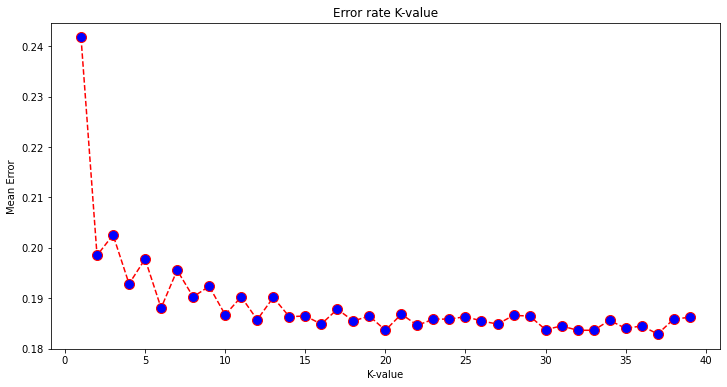

In [42]:
error=[]
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

for i in range(1,40):
  model=KNeighborsClassifier(n_neighbors=i)
  model.fit(X_train,y_train)
  predat_i= model.predict(X_test)
  error.append(np.mean(predat_i != y_test))


plt.figure(figsize=(12,6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error rate K-value')
plt.xlabel('K-value')
plt.ylabel('Mean Error')

### Training

In [43]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=16, metric='minkowski', p=2)
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=16)

### Predicting the salary

In [47]:
age = int(input('Enter age :'))
edu = int(input('Enter Education :'))
cg = int(input('Capital Gain :'))
wh = int(input('Working hours per week  :'))

newEmp = [[age,edu,cg,wh]]
result = model.predict(sc.transform(newEmp))

if result:
    print("Employee might got salary above 50k")
else:
    print("Employee might not got salary above 50k")

Enter age :40
Enter Education :12
Capital Gain :40000
Working hours per week  :48
Employee might got salary above 50k


### Predicting for all test data

In [45]:
y_pred=model.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


### Evaluating Model , confusion model and accurary score

In [46]:
from sklearn.metrics import confusion_matrix , accuracy_score
cm=confusion_matrix(y_test,y_pred)
print("Confusin matrix for the predicted output is:")
print(cm)
print("Accuracy of the model made is: {0}%".format(accuracy_score(y_test,y_pred)*100))

Confusin matrix for the predicted output is:
[[5865  328]
 [1177  771]]
Accuracy of the model made is: 81.51332760103182%
